### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Check out the Data

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [34]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [40]:
# Extracting independent and dependent variable
a=dataset.YearsExperience.values
b=dataset.Salary.values
a
b

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [3]:
# Extracting independent variable: X
X = dataset.iloc[:, :-1].values
# Extracting dependent variable: y
y = dataset.iloc[:, 1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

### Train Test Split

In [4]:
##Splitting the test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state = 0)

### Creating and Training the Model

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions from our Model

In [37]:
#Predicted output
y_pred = regressor.predict(X_test)

In [16]:
##Actual vs Predicted value
df=pd.DataFrame(X_test,columns=['actual input'])
df["actual output"]=y_test
df["predicted output"]=y_pred
df

,actual input,actual output,predicted output
0,1.5,37731,40835.105909
1,10.3,122391,123079.399408
2,4.1,57081,65134.556261
3,3.9,63218,63265.367772
4,9.5,116969,115602.645454
5,8.7,109431,108125.891499
6,9.6,112635,116537.239698
7,4.0,55794,64199.962017
8,5.3,83088,76349.687193
9,7.9,101302,100649.137545


### Visualising the Test set results

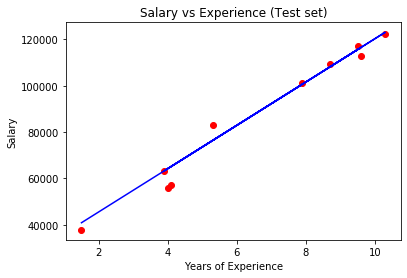

In [7]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [21]:
print("Regressor slope:    ", regressor.coef_[0])
print("Regressor intercept:", regressor.intercept_)

Regressor slope:     9345.942443122372
Regressor intercept: 26816.192244031183


### Prediction for a new input

In [46]:
YearsExperience= 30
print("Salary for given Years of Experience is :     %.f"    %(regressor.predict([[YearsExperience]])))


Salary for given Years of Experience is :     307194


## Regression Evaluation Metrics

In [34]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("MAE is {}".format(MAE))

MAE is 3426.4269374307078


In [33]:
MSE=metrics.mean_squared_error(y_test,y_pred)
print("MSE is {}".format(MSE))

MSE is 21026037.329511296


In [26]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE is {}".format(RMSE))

RMSE 4585


In [35]:
r2 = metrics.r2_score(y_test, y_pred)
print("R squared error is {}".format(r2))

R squared error is 0.9749154407708353
